### Basic Image operations
#### Ref
[Basic image ops](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_basic_ops/py_basic_ops.html)
#### Notes
1. Image is array of pixel values. 

In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [8]:
img = cv2.imread('/home/cognitifai/Pictures/image1.png', 1) # Read as BGR format
print("shape - ", img.shape)
print("Number of pixels - ", img.size)
print("Pixel type - ", img.dtype)

shape -  (334, 771, 3)
Number of pixels -  772542
Pixel type -  uint8


In [4]:
# Access intensity values at a pixel by indexing with its coordinates
px = img[50,50]
print(px)

[204 242 255]


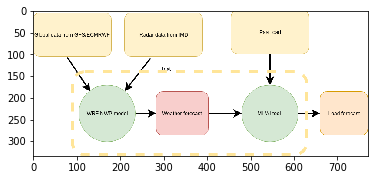

In [11]:
# Get RoI from Image by array indexing
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

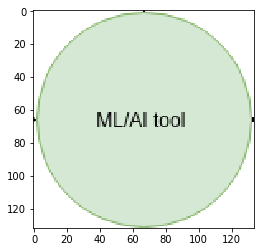

In [21]:
circle = img[170:302,478:612]
plt.imshow(cv2.cvtColor(circle, cv2.COLOR_BGR2RGB))
plt.show()

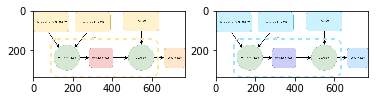

In [33]:
# split and merge color channels
b,g,r = cv2.split(img)  # costly operation
img_rgb = cv2.merge([r,g,b])
plt.subplot(121), plt.imshow(img_rgb)
plt.subplot(122), plt.imshow(img)
plt.show()

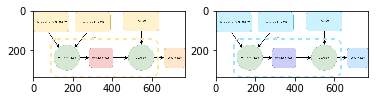

In [32]:
# Numpy indexing for split and merge
b,g,r = img[:,:,0],img[:,:,1],img[:,:,2]
img_rgb2 = np.stack((r,g,b), axis=2)
plt.subplot(121), plt.imshow(img_rgb2)
plt.subplot(122), plt.imshow(img)
plt.show()

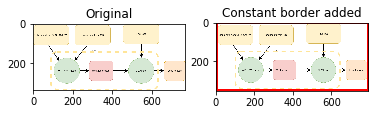

In [37]:
# Image borders - Padding
# Use cv2.copyMakeBorder() to add border pixels to image array
BORDER_COLOR = [255,0,0]

img_constborder = cv2.copyMakeBorder(img_rgb, 10,10,10,10,cv2.BORDER_CONSTANT, value=BORDER_COLOR)
plt.subplot(121), plt.imshow(img_rgb), plt.title('Original')
plt.subplot(122), plt.imshow(img_constborder), plt.title('Constant border added')
plt.show()

### Arithmatic ops on image
#### Ref
[Arithmatic ops on image](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_image_arithmetics/py_image_arithmetics.html)

In [38]:
# Image Addition. We can use numpy add (will do modulo) OR cv2.add() which will saurate, based on dtype of arrays involved


In [45]:
a = np.array([[1,2,3],[4,5,6]], dtype=np.uint8)
b = np.array([[1.1,2.2,3.3],[4.4,5.5,6.6]], dtype=np.float16)

In [48]:
c = a+b
print(c)

[[ 2.1  4.2  6.3]
 [ 8.4 10.5 12.6]]


#### Blending images
we can perform weighted summation of image arrays using `cv2.addWeighted()` according to equation - ![Image blending](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/math/ce1ee966236689be38f566b9fb6bc92812bbd54d.png "Belnding 2 images as weighted sum")

### Bitwise operations
#### Ref
[Bitwise ops on Images](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_image_arithmetics/py_image_arithmetics.html)
#### Notes
1. We can perform bitwise OR, AND, XOR for extracting part of image, defining ROI(non-rect as well).

In [49]:
# Put a logo image onto another larger image
img_below = cv2.imread("/home/cognitifai/Pictures/landscape.jpg",1)
img_above = cv2.imread("/home/cognitifai/Pictures/logo_black_bd.png", 1)

In [82]:
# convert top layer to gray
img_above_gray = cv2.cvtColor(img_above, cv2.COLOR_BGR2GRAY)

# generate mask and inv mask 
maxval=255
_,mask = cv2.threshold(img_above_gray, thresh=10, maxval=maxval, type=cv2.THRESH_BINARY)
mask_inv = maxval - mask

# Apply mask_inv (blackout) to bottom layer image
h,w,c = img_above.shape
roi = img_below[:h,:w]
# The operation of "And" will be performed only if mask[i] doesn't equal zero, 
# else the the result of and operation will be zero. 
img_below_bg = cv2.bitwise_and(roi,roi,mask=mask_inv)
img_above_fg = cv2.bitwise_and(img_above, img_above, mask=mask)
patch_final = cv2.add(img_below_bg, img_above_fg)

# Put this final patch into ROI and update the original image
img_below[:h,:w,:] = patch_final

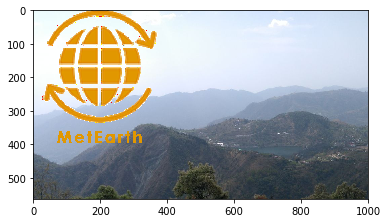

In [83]:
# Visualize image
plt.imshow(cv2.cvtColor(img_below, cv2.COLOR_BGR2RGB))
plt.show()

### Performance Measurement and optimization
#### Ref
(Perf Measurement)[https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_optimization/py_optimization.html]
#### Notes
1. `cv2.getTickCount()` gives # of clock cycles to that moment
2. `cv2.getTickFrequency()` gives # of cycles per second
3. Sometimes you may need to compare the performance of two similar operations. IPython provides a magic command `%timeit` to perform this. It runs the code several times to get more accurate results. It is suitable to measure single line codes and not the code block.

In [92]:
import cv2
import time

In [96]:
img = cv2.imread('/home/cognitifai/Pictures/image1.png', 1)

c1 = cv2.getTickCount()
for i in range(5,49,2):
    img = cv2.medianBlur(img,i)
c2 = cv2.getTickCount()
t = (c2-c1)/cv2.getTickFrequency()
print("Elapsed time is - %0.3f" % t)

Elapsed time is - 0.460


In [97]:
# using time module
img = cv2.imread('/home/cognitifai/Pictures/image1.png', 1)

t1 = time.time()
for i in range(5,49,2):
    img = cv2.medianBlur(img,i)
t2 = time.time()
t = t2-t1
print("Elapsed time is - %0.3f" % t)

Elapsed time is - 0.459


In [114]:
x=5
%timeit y=x**2
%timeit y=x*x

z = np.uint8([5])
%timeit y=z*z
%timeit y=np.square(z)

180 ns ± 1.72 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
41.5 ns ± 0.098 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
436 ns ± 6.75 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
485 ns ± 26.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


-  The main thing to be noted here is that, first try to implement the algorithm in a simple manner. **Once it is working, profile it, find the bottlenecks and optimize them**.
- **Avoid using loops** in Python as far as possible, especially double/triple loops etc. They are inherently slow.
- **Vectorize the algorithm/code** to the maximum possible extent because Numpy and OpenCV are optimized for vector operations.
- Exploit the **cache coherence**.
- **Never make copies of array unless it is needed. Try to use views instead**. Array copying is a costly operation.